In [1]:
import os, json, gzip, pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [2]:
###################################### LOAD DATA #############################################################
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz
# l.strip() to prevent the load of empty line
# get into pandas dataframe for better data handling
input_file = '../Data/reviews_Movies_and_TV_5.json.gz'
data = []
with gzip.open(input_file) as f:
    for l in f:
        data.append(json.loads(l.strip()))

df = pd.DataFrame.from_dict(data)
df = df[['reviewText', 'overall']]

In [3]:
# total length of dataframe, this number equals total number of review
print("Amount of reviews: ", len(data))

Amount of reviews:  1697533


In [4]:
# first row of the dataframe
print(df.loc[0])

reviewText    This is a charming version of the classic Dick...
overall                                                       4
Name: 0, dtype: object


In [5]:
############################# DUPLICATE DETECTION & DELETION ##################################################
print('Before deleting duplicate entries: ', len(df))
df = df.drop_duplicates()
print('After deleting duplicate entries: ', len(df))
dup = df[df['reviewText'].isin(df['reviewText'][df['reviewText'].duplicated()])]
# print(len(dup))
# print(dup[5:50])
print('Before deleting duplicate review texts: ', len(df))
df = df.drop_duplicates(subset=['reviewText'])
print('After deleting duplicate review texts: ', len(df))

# Sample survey
# dup[(dup['reviewText'].str.contains("love") | dup['reviewText'].str.contains("Love") | dup['reviewText'].str.contains("LOVE"))]
# dup[(dup['reviewText'].str.contains("good") | dup['reviewText'].str.contains("Good"))]
# dup[(dup['reviewText'].str.contains("great") | dup['reviewText'].str.contains("Great"))]
# dup[(dup['reviewText'].str.contains("ok") | dup['reviewText'].str.contains("OK"))]
# dup[(dup['reviewText'].str.contains("nice") | dup['reviewText'].str.contains("Nice"))]
# dup[(dup['reviewText'].str.contains("perfect") | dup['reviewText'].str.contains("Perfect"))]

Before deleting duplicate entries:  1697533
After deleting duplicate entries:  1696503
Before deleting duplicate review texts:  1696503
After deleting duplicate review texts:  1696352


In [6]:
################################## EMPTY REVIEWS DELETION ######################################################
print('Before deleting empty review texts: ', len(df))
df = df[df['reviewText'] != '']
print('After deleting empty review texts: ', len(df))
# df[df['reviewText'].str.contains("null")]

Before deleting empty review texts:  1696352
After deleting empty review texts:  1696351


In [7]:
#################################### WORD COUNT ################################################################
df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split(" ")))

In [24]:
longest_t = df[df['word_count'] == max(df['word_count'])]
print('The longest review text in our sample has {} words.'.format(max(df['word_count'])))
print('Longest review text:' + '\n')
print(longest_t.reviewText)

The longest review text in our sample has 6105 words.
Longest review text:

331753    Well, here comes another one of my long review...
Name: reviewText, dtype: object


In [23]:
shortest_t = df[df['word_count'] == min(df['word_count'])]
print('The shortest review text in our sample has {} words.'.format(min(df['word_count'])))
print('Review text with the shortest length of {} word appearing {} times.'.format(min(df['word_count']), len(shortest_t)))

The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 333 times.


In [25]:
df['word_count'].value_counts().sort_index()

1       333
2       790
3       863
4       827
5       795
       ... 
5868      1
5921      1
5925      2
5950      1
6105      1
Name: word_count, Length: 2765, dtype: int64

Text(0.5, 1.0, 'Text lengths in words (Amazon Movie&TV)')

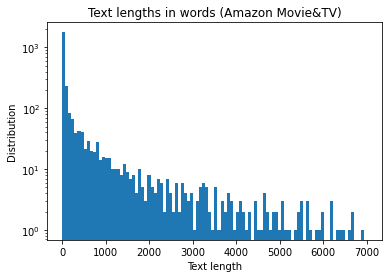

In [28]:
# (df['word_count'].value_counts().sort_index())    #Pandas Series
plt.rcParams['figure.facecolor'] = 'white'
plt.hist(df['word_count'].value_counts().sort_index(), range=(0,7000), bins=100, log=True)
plt.xlabel('Text length')
plt.ylabel('Distribution')
plt.title('Text lengths in words (Amazon Movie&TV)')

In [16]:
df['word_count'].describe()

count    1.696351e+06
mean     1.643882e+02
std      2.084139e+02
min      1.000000e+00
25%      3.600000e+01
50%      8.800000e+01
75%      2.110000e+02
max      6.105000e+03
Name: word_count, dtype: float64

In [ ]:
################################## RATING DISTRIBUTION ###########################################

from matplotlib import pyplot as py
print(df['overall'].value_counts())
# xticks =[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
# # plt.xticks(np.arange(0.0,6.0,1.0))
# plt.xticks(xticks)
# plt.hist(df['overall'], xticks, align='left', )
plt.rcParams['figure.facecolor'] = 'white'
plt.xlabel('Class')
plt.ylabel('Amount')
plt.hist(df['overall'], bins=np.arange(0.5, 6), rwidth=0.5)

In [ ]:
data = df['overall'].value_counts()
fig, ax = plt.subplots()
ax.bar(data.index, data.values)

In [ ]:
amounts = data.values
print(amounts)


In [ ]:
df['unixReviewTime'].count()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text = ["They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
vocab = vectorizer.vocabulary_
print(len(vocab))

In [ ]:
df['char_count'] = df['reviewText'].apply(lambda review: len(review))

In [ ]:
print(df['word'].value_counts())

import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.hist(df['char_count'], bins=100, weights= np.ones(len(df))/len(df))
plt.xlabel('Text length')
plt.ylabel('Distribution')
plt.title('Text lengths  in char')

In [ ]:
special = df[(df['char_count']==4)]
# df = df[~(df['reviewText']=='')]
print(special)

In [ ]:
print("Shape: ", df.shape)

In [ ]:
print(df.info())

In [ ]:
df.describe(include='all')

In [ ]:
print(df['overall'].dtype)

In [ ]:
print(df[df['char_count']]==0)

In [ ]:
data = []
with gzip.open('../Data/reviews_Movies_and_TV_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

In [ ]:
# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)

print(len(df))

In [ ]:
df.head()

In [ ]:
print(df.shape)

In [ ]:
print(df.info())

In [ ]:
df.describe(include='all')

In [ ]:
df['overall'].value_counts()

In [ ]:
df['unixReviewTime'].count()